## MVA-MP1: Image Classification and Regression
**Hind DADOUN**

## 2- Getting Started

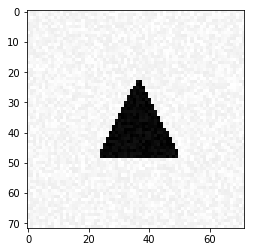

In [130]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)


def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]


im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

im = generate_a_disk(10)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

#Function for last question
def generate_dataset_classification1(nb_samples, noise=0.0, free_location=False,pair=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    X_noise = np.zeros([nb_samples,im_size])
    Y_noise = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        #if i % 10 == 0:
            #print(i)
        category = np.random.randint(3)
        np.random.seed(i)
        if category == 0:
            X[i] = generate_a_rectangle(0.0, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(0.0, free_location)
        else:
            [X[i], V] = generate_a_triangle(0.0, free_location)
        Y[i] = category
            
        if pair==True: 
                np.random.seed(i)
                if category == 0:
                    X_noise[i] = generate_a_rectangle(noise, free_location)
                elif category == 1: 
                    X_noise[i] = generate_a_disk(noise, free_location)
                else:
                    [X_noise[i], V_noise] = generate_a_triangle(noise, free_location)
                Y_noise[i] = category
    X = (X ) / (255 )            
    if pair==True: 
        X_noise = (X_noise + noise) / (255 + 2 * noise)
        res=[[X,Y],[X_noise,Y_noise]]
        return res
    else:    
        return [X, Y]

def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]


def generate_test_set_classification1(pair=False):
    np.random.seed(42)
    if pair==False: 
        [X_test, Y_test] = generate_dataset_classification1(300, 20, True)
        Y_test = np_utils.to_categorical(Y_test, 3) 
        return [X_test, Y_test]
    else: 
        [X_test, Y_test],[X_test_noise,Y_test_noise] = generate_dataset_classification1(300, 20, True,pair=True)
        Y_test = np_utils.to_categorical(Y_test, 3)
        Y_test_noise = np_utils.to_categorical(Y_test_noise, 3)
        
        return [[X_test, Y_test],[X_test_noise,Y_test_noise]]
        

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        #if i % 10 == 0:
         #   print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]



## 3- Simple Classification

In [121]:
import keras
from keras.layers import Dense
from keras.models import Sequential,Model
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.layers import UpSampling2D, Input

In [122]:
[X_train, Y_train] = generate_dataset_classification(300, 20)
[X_test, Y_test]=generate_test_set_classification()

Creating data:
Creating data:


In [123]:
#Hot-encodding
Y_train = np_utils.to_categorical(Y_train, 3)

In [124]:
#Creating a model with the sgd optimizer
model = Sequential()
model.add(Dense(32,activation = 'relu', input_shape = (X_train.shape[1],)))
model.add(Dense(3, activation = 'softmax'))
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics =['accuracy'])
model.fit(X_train, Y_train, epochs = 100, validation_split=0.3);

Train on 210 samples, validate on 90 samples
Epoch 1/100
210/210 [==============================] - 2s 10ms/step - loss: 1.7604 - acc: 0.3810 - val_loss: 1.0965 - val_acc: 0.3111
Epoch 2/100
210/210 [==============================] - 0s 316us/step - loss: 1.0522 - acc: 0.4524 - val_loss: 1.0256 - val_acc: 0.6000
Epoch 3/100
210/210 [==============================] - 0s 317us/step - loss: 1.0613 - acc: 0.4714 - val_loss: 1.0244 - val_acc: 0.6333
Epoch 4/100
210/210 [==============================] - 0s 286us/step - loss: 1.0248 - acc: 0.5810 - val_loss: 1.0200 - val_acc: 0.5333
Epoch 5/100
210/210 [==============================] - 0s 311us/step - loss: 1.0073 - acc: 0.5619 - val_loss: 0.9736 - val_acc: 0.6778
Epoch 6/100
210/210 [==============================] - 0s 345us/step - loss: 0.9738 - acc: 0.6333 - val_loss: 0.9943 - val_acc: 0.4667
Epoch 7/100
210/210 [==============================] - 0s 335us/step - loss: 0.9546 - acc: 0.5857 - val_loss: 0.9168 - val_acc: 0.6889
Epoch 8/100

In [115]:
# Creating a model with the adam optimizer :
model1 = Sequential()
model1.add(Dense(32,activation = 'relu', input_shape = (X_train.shape[1],)))
model1.add(Dense(3, activation = 'softmax'))
model1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics =['accuracy'])
model1.fit(X_train, Y_train, batch_size = 32, epochs = 100, validation_split=0.3)

Train on 210 samples, validate on 90 samples
Epoch 1/100
210/210 [==============================] - 1s 4ms/step - loss: 2.1641 - acc: 0.3571 - val_loss: 1.6329 - val_acc: 0.3111
Epoch 2/100
210/210 [==============================] - 0s 271us/step - loss: 1.2661 - acc: 0.3905 - val_loss: 0.9399 - val_acc: 0.4778
Epoch 3/100
210/210 [==============================] - 0s 293us/step - loss: 1.0391 - acc: 0.5810 - val_loss: 0.7943 - val_acc: 0.6556
Epoch 4/100
210/210 [==============================] - 0s 274us/step - loss: 0.8016 - acc: 0.7048 - val_loss: 0.7868 - val_acc: 0.7111
Epoch 5/100
210/210 [==============================] - 0s 286us/step - loss: 0.7295 - acc: 0.7381 - val_loss: 0.7086 - val_acc: 0.7111
Epoch 6/100
210/210 [==============================] - 0s 276us/step - loss: 0.6649 - acc: 0.7429 - val_loss: 0.5960 - val_acc: 0.8222
Epoch 7/100
210/210 [==============================] - 0s 282us/step - loss: 0.5738 - acc: 0.7857 - val_loss: 0.5333 - val_acc: 0.8222
Epoch 8/100


In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 32)                165920    
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 99        
Total params: 166,019
Trainable params: 166,019
Non-trainable params: 0
_________________________________________________________________


In [116]:
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
print('category of X with sgd:',np.argmax(model.predict(X_test))+1)
print('category of X with adam:',np.argmax(model1.predict(X_test))+1)

category of X with sgd: 2
category of X with adam: 2


## 4- Visualization of the Solution


**We would like to visualize the weights of the linear classifier. Check the output of the function 
model.get_weights(): The first part corresponds to the matrix of the classifier. Its columns have
the same size as the input images, because Keras uses vector-matrix multiplications instead of matrixvector
multiplications. Visualize the 3 columns as images**

In [126]:
#Let's check the shapes
print(model.get_weights()[0].shape)
print('biases',model.get_weights()[1].shape)
print(model.get_weights()[2].shape)
print('biases',model.get_weights()[3].shape)
#Let's vizualize the weights for the model with adam optimizer 
column1=model1.get_weights()[0]
column2=model1.get_weights()[2]
image=column1.dot(column2)


(5184, 32)
biases (32,)
(32, 3)
biases (3,)


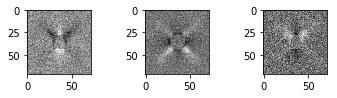

In [131]:
plt.subplot(331)
plt.imshow(image[:,0].reshape(72,72), cmap='gray')
plt.subplot(332)
plt.imshow(image[:,1].reshape(72,72), cmap='gray')
plt.subplot(333)
plt.imshow(image[:,2].reshape(72,72), cmap='gray')

## 5- A More Difficult Classification Problem

In [75]:
[X_train_n, Y_train_n] = generate_dataset_classification(300, 20, True)
[X_test_n, Y_test_n] = generate_test_set_classification()
Y_train_n = np_utils.to_categorical(Y_train_n, 3)

Creating data:
Creating data:


In [140]:
print(X_train_n.shape)

(300, 5184)


In [141]:
model1.fit(X_train_n, Y_train_n, batch_size = 32, epochs = 100, validation_split = 0.3)
score = model1.evaluate(X_test_n, Y_test_n)

Train on 210 samples, validate on 90 samples
Epoch 1/100
210/210 [==============================] - 0s 219us/step - loss: 3.1495 - acc: 0.3667 - val_loss: 2.6399 - val_acc: 0.4111
Epoch 2/100
210/210 [==============================] - 0s 414us/step - loss: 2.9664 - acc: 0.3905 - val_loss: 2.8392 - val_acc: 0.2556
Epoch 3/100
210/210 [==============================] - 0s 436us/step - loss: 2.2371 - acc: 0.4381 - val_loss: 3.2791 - val_acc: 0.2222
Epoch 4/100
210/210 [==============================] - 0s 407us/step - loss: 2.1803 - acc: 0.3571 - val_loss: 1.7464 - val_acc: 0.4111
Epoch 5/100
210/210 [==============================] - 0s 439us/step - loss: 1.6222 - acc: 0.4476 - val_loss: 1.6916 - val_acc: 0.3778
Epoch 6/100
210/210 [==============================] - 0s 370us/step - loss: 1.4302 - acc: 0.4667 - val_loss: 2.7393 - val_acc: 0.2444
Epoch 7/100
210/210 [==============================] - 0s 386us/step - loss: 1.8644 - acc: 0.3714 - val_loss: 2.5274 - val_acc: 0.2778
Epoch 8/10

In [3]:
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D,Activation
from keras.layers import Dropout
from keras.layers import Flatten
model2 = Sequential()
model2.add(Conv2D(16,(5,5), activation='relu', input_shape=(72,72,1))) #filters
model2.add(MaxPooling2D(pool_size=(2,2))) #pooling layer
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(3))
model2.add(Activation('softmax'))

In [182]:
#Reshape Input
X_train_n = X_train_n.reshape(X_train_n.shape[0], 72, 72, -1)
X_train_n = X_train_n.astype('float32')
print(X_train_n.shape)
X_test_n = X_test_n.reshape(X_test_n.shape[0], 72, 72, -1)
X_test_n = X_test_n.astype('float32')

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.fit(X_train_n, Y_train_n, batch_size = 32, epochs = 50, validation_split = 0.3)
score2 = model2.evaluate(X_test_n, Y_test_n)

(300, 72, 72, 1)
Train on 210 samples, validate on 90 samples
Epoch 1/50
210/210 [==============================] - 3s 13ms/step - loss: 1.8103 - acc: 0.3429 - val_loss: 1.1181 - val_acc: 0.3556
Epoch 2/50
210/210 [==============================] - 1s 5ms/step - loss: 1.1559 - acc: 0.4762 - val_loss: 0.9786 - val_acc: 0.4556
Epoch 3/50
210/210 [==============================] - 1s 5ms/step - loss: 0.9767 - acc: 0.5810 - val_loss: 0.9532 - val_acc: 0.6556
Epoch 4/50
210/210 [==============================] - 1s 5ms/step - loss: 0.8498 - acc: 0.6810 - val_loss: 0.9216 - val_acc: 0.6556
Epoch 5/50
210/210 [==============================] - 1s 5ms/step - loss: 0.7692 - acc: 0.8048 - val_loss: 0.8003 - val_acc: 0.7222
Epoch 6/50
210/210 [==============================] - 1s 5ms/step - loss: 0.6899 - acc: 0.7476 - val_loss: 0.7517 - val_acc: 0.7667
Epoch 7/50
210/210 [==============================] - 1s 5ms/step - loss: 0.5753 - acc: 0.8333 - val_loss: 0.7011 - val_acc: 0.7667
Epoch 8/50
21

In [172]:
eval=model2.evaluate(X_test_n, Y_test_n)

300/300 [==============================] - 0s 1ms/step


**What is the value of the loss function on this test set when using your deep network?**


In [175]:
print('loss function:',eval[0])

loss function: 1.0937793254852295


## 6- A Regression Problem

Creating data:


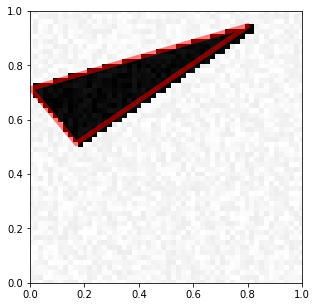

In [65]:
[X_train_b, Y_train_b] = generate_dataset_regression(300, 20)
visualize_prediction(X_train_b[0], Y_train_b[0])

In [66]:
[X_test_b, Y_test_b] = generate_test_set_regression()

Creating data:


In [52]:
# def normalize_triangle(Y):
# # computing distances of each point from the origin.
#     p =[[Y[0], Y[1], np.sqrt(Y[0]**2 + Y[1]**2)],
#     [Y[2], Y[3], np.sqrt(Y[2]**2 + Y[3]**2)],
#     [Y[4], Y[5], np.sqrt(Y[4]**2 + Y[5]**2)]]
#     p.sort(key=lambda x:x[2])
#     # y is the sequence of coordinates (after sorting):
#     y = np.array([p[0][0], p[0][1], p[1][0], p[1][1], p[2][0], p[2][1]])
#     return y
# for i in range(20):
#     Y_train_b[i] = normalize_triangle(Y_train_b[i])
#     Y_test_b[i]=normalize_triangle(Y_test_b[i])


In [67]:
X_train_b = X_train_b.reshape(X_train_b.shape[0], 72, 72, 1)
X_train_b = X_train_b.astype('float32')
X_test_b = X_test_b.reshape(X_test_b.shape[0], 72, 72, 1)
X_test_b = X_test_b.astype('float32')


In [68]:
from keras import optimizers

model3 = Sequential()
model3.add(Conv2D(32, activation='relu', input_shape=(72,72,1), kernel_size=(5,5), padding="same"))
model3.add(MaxPooling2D(pool_size=(2,2), padding="same"))
model3.add(Conv2D(32, (5,5), activation="relu", padding="same"))
model3.add(MaxPooling2D(pool_size=(2,2), padding="same"))
model3.add(Flatten())
model3.add(Dense(256, activation='relu'))
model3.add(Dense(256, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(6))


# model3 = Sequential()
# model3.add(Conv2D(16,(5,5), activation='relu', input_shape=(72,72,1))) #filters
# model3.add(MaxPooling2D(pool_size=(2,2))) #pooling layer
# model3.add(Conv2D(32,(5,5), activation='relu')) #filters
# model3.add(MaxPooling2D(pool_size=(2,2))) #pooling layer
# model3.add(Conv2D(64,(5,5), activation='relu')) #filters
# model3.add(MaxPooling2D(pool_size=(2,2))) #pooling layer
# model3.add(Flatten())
# model3.add(Dense(64))
# model3.add(Activation('relu'))
# model3.add(Dropout(0.5))
# model3.add(Dense(6))


checkpoint =keras.callbacks.ModelCheckpoint('model-{epoch:03d}.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto')  

model3.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model3.fit(X_train_b, Y_train_b, batch_size = 32, epochs = 20,shuffle=True, validation_split = 0.3,callbacks=[checkpoint])

score3 = model3.evaluate(X_test_b, Y_test_b);

Train on 210 samples, validate on 90 samples
Epoch 1/20
210/210 [==============================] - 5s 26ms/step - loss: 0.1609 - acc: 0.2190 - val_loss: 0.0915 - val_acc: 0.2000

Epoch 00001: val_loss improved from inf to 0.09154, saving model to model-001.h5
Epoch 2/20
210/210 [==============================] - 2s 12ms/step - loss: 0.0911 - acc: 0.1667 - val_loss: 0.0756 - val_acc: 0.2556

Epoch 00002: val_loss improved from 0.09154 to 0.07564, saving model to model-002.h5
Epoch 3/20
210/210 [==============================] - 3s 12ms/step - loss: 0.0768 - acc: 0.2381 - val_loss: 0.0667 - val_acc: 0.3000

Epoch 00003: val_loss improved from 0.07564 to 0.06672, saving model to model-003.h5
Epoch 4/20
210/210 [==============================] - 2s 12ms/step - loss: 0.0657 - acc: 0.3190 - val_loss: 0.0618 - val_acc: 0.2778

Epoch 00004: val_loss improved from 0.06672 to 0.06175, saving model to model-004.h5
Epoch 5/20
210/210 [==============================] - 2s 12ms/step - loss: 0.0593 -

In [69]:
print(score3)

[0.08729478269815445, 0.2500000000993411]


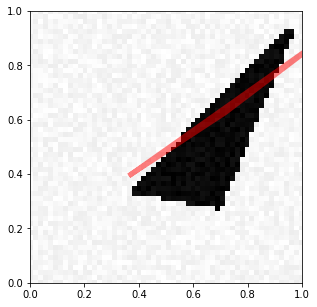

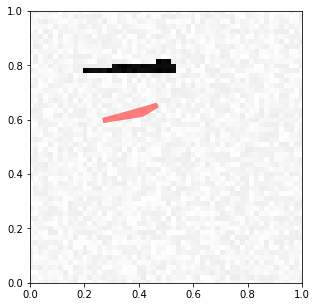

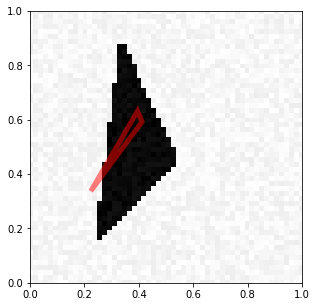

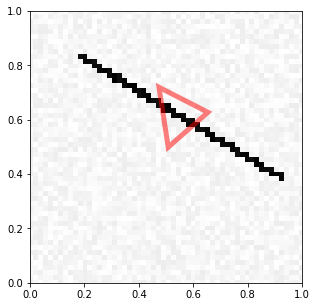

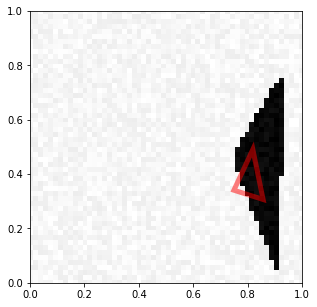

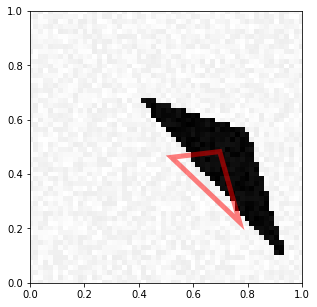

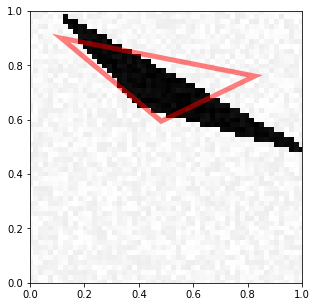

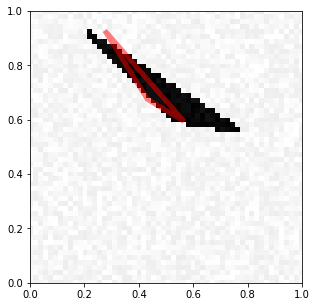

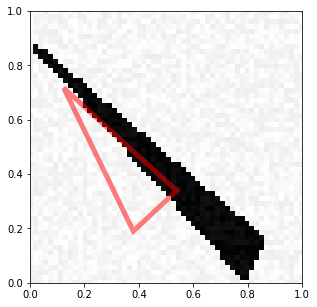

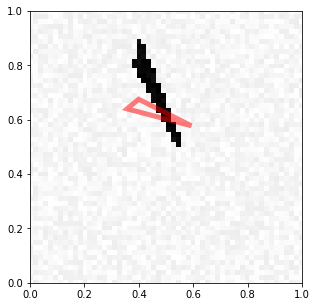

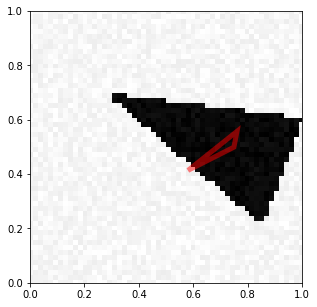

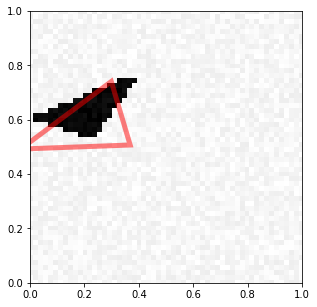

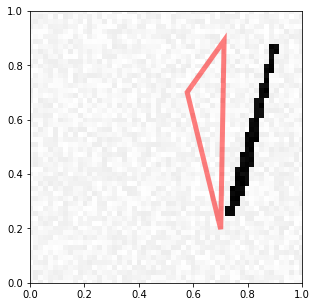

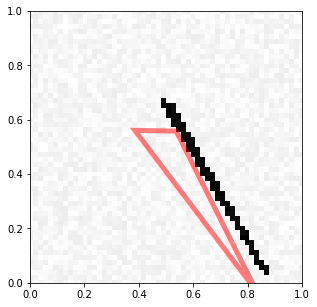

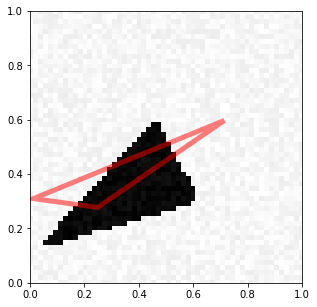

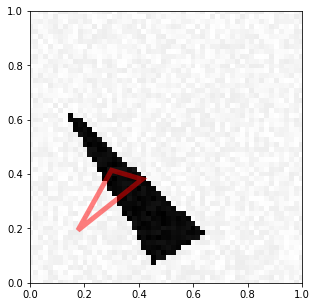

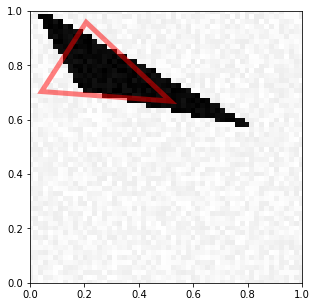

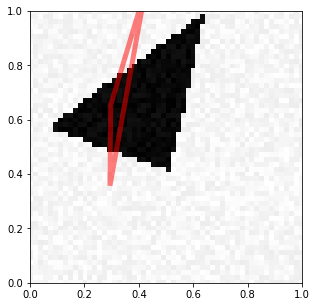

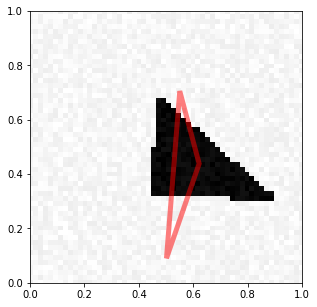

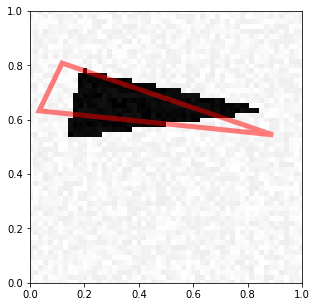

In [133]:
pred=model3.predict(X_test_b)
for i in range(20):
    visualize_prediction(X_test_b[i], pred[i])

## 7 Image Denoising

In [115]:
[X_train, Y_train],[X_train_noise,Y_train_noise]=generate_dataset_classification1(300, 20,pair=True)
[X_test, Y_test],[X_test_noise,Y_test_noise]=generate_test_set_classification1(pair=True)

Creating data:
Creating data:


In [116]:
input_img = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(1, (3, 3), padding='same', activation="sigmoid")(x)

model = Model(input_img, decoded)

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(
    np.reshape(X_train, (X_train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1)),
    np.reshape(X_train_noise, (X_train_noise.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1)),
    epochs=3,
    batch_size=64,
    validation_split=0.3
);

Train on 210 samples, validate on 90 samples
Epoch 1/3
210/210 [==============================] - 7s 31ms/step - loss: 0.1764 - val_loss: 0.1190
Epoch 2/3
210/210 [==============================] - 5s 22ms/step - loss: 0.1037 - val_loss: 0.0641
Epoch 3/3
210/210 [==============================] - 4s 20ms/step - loss: 0.0641 - val_loss: 0.0489


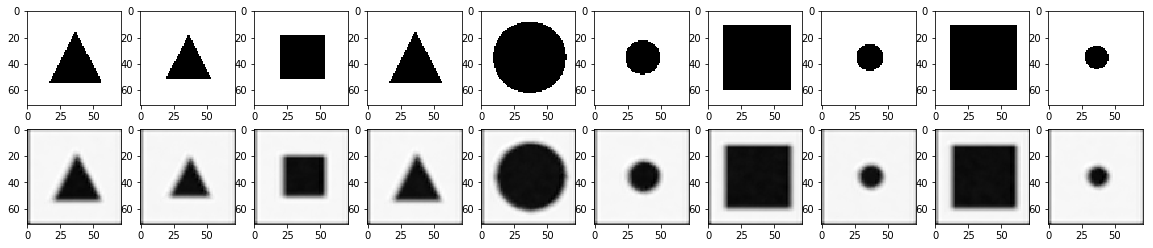

In [118]:
n = 10
decoded_imgs = model.predict(np.reshape(X_train_noise[:n], (n, IMAGE_SIZE, IMAGE_SIZE, 1)))

plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_train[i].reshape(IMAGE_SIZE, IMAGE_SIZE), cmap="gray")
     # reconstructed images 
    ax = plt.subplot(2, n, n + i + 1)
    plt.imshow(decoded_imgs[i].reshape(IMAGE_SIZE, IMAGE_SIZE), cmap="gray")

plt.show()